## Basics of Image Analysis in Python
<hr>

### Packages
* scipy
* scikit-image
* opencv
* PIL (pillow)
* ITK

<hr>

In [1]:
import matplotlib.pyplot as pl
pl.style.use(['notebook','images'])
%matplotlib notebook

<hr>
### Load and show an image

<IPython.core.display.Javascript object>


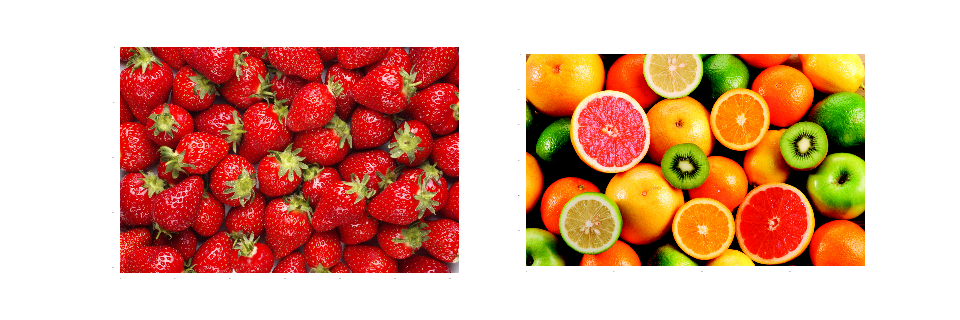

In [2]:
from skimage.io import imread
img1 = imread('im1.jpg')
img2 = imread('im2.jpg')

fig,axs = pl.subplots(1, 2, num='Original Images')
axs[0].imshow(img1)
axs[1].imshow(img2)

### How are images represented in Python?

In [3]:
print('Type:', type(img1), '\n')
print('Shape:', img1.shape, '\n')
print(img1.dtype, '\n')

Type: <class 'numpy.ndarray'> 

Shape: (2048, 3072, 3) 

uint8 



### Basic image manipulation

<IPython.core.display.Javascript object>


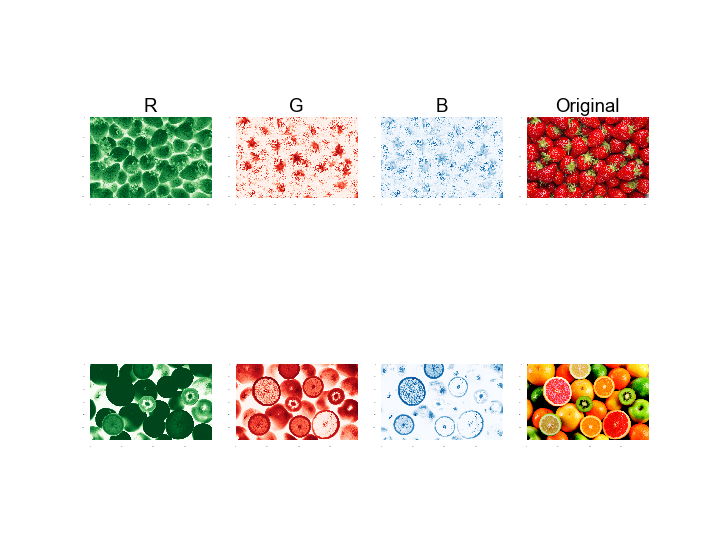

In [6]:
# IMAGE[YPOS, XPOS, CHANNEL]

fig,axs = pl.subplots(2,4, figsize=(9,7), num='Channels')

axs[0,-1].imshow(img1)
axs[0,-1].set_title('Original')
axs[1,-1].imshow(img2)

for channel,cmap,title in zip(range(3), (pl.cm.Greens,pl.cm.Reds,pl.cm.Blues), ('R','G','B')):
    ax = axs[0,channel]
    ax.imshow(img1[:,:,channel], cmap=cmap)
    ax.set_title(title)
    
    ax = axs[1,channel]
    ax.imshow(img2[:,:,channel], cmap=cmap)

<IPython.core.display.Javascript object>


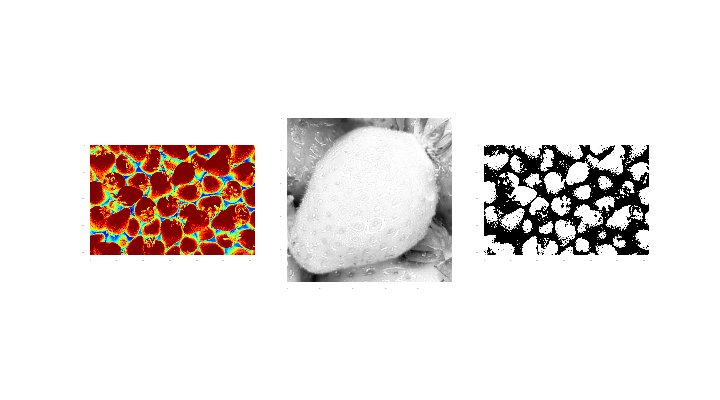

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [12]:
fig,axs = pl.subplots(1,3,num='Basic Manipulations', figsize=(9,5))

# take the red channel
red = img1[:,:,0]
axs[0].imshow(red, vmin=0, vmax=200, cmap=pl.cm.jet)

# crop it
cropped = red[300:800, 1500:2000]
axs[1].imshow(cropped)

# threshold it
thresholded = red>190
axs[2].imshow(thresholded)

red>190

### Cell culture example

<IPython.core.display.Javascript object>


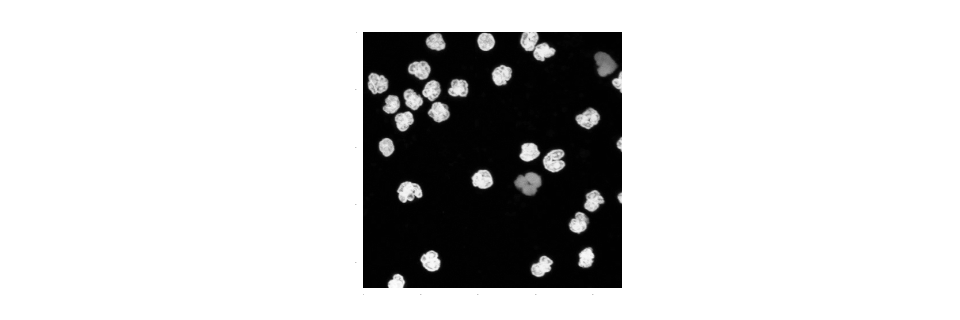

In [13]:
# load an image

im = imread('im4.tif')
pl.figure('Cell Culture')
pl.imshow(im)

<IPython.core.display.Javascript object>


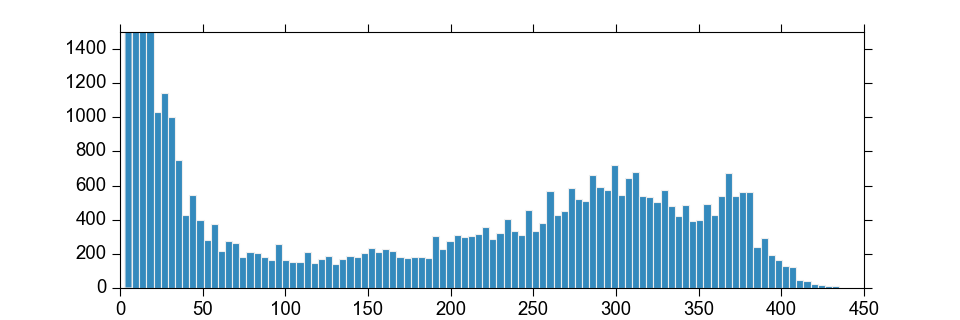

(0, 1500)

In [14]:
# inspect the image histogram

pl.figure('Histogram')
with pl.style.context('normal'):
    pl.hist(im.ravel(), bins=100)
pl.ylim(0,1500)

<IPython.core.display.Javascript object>


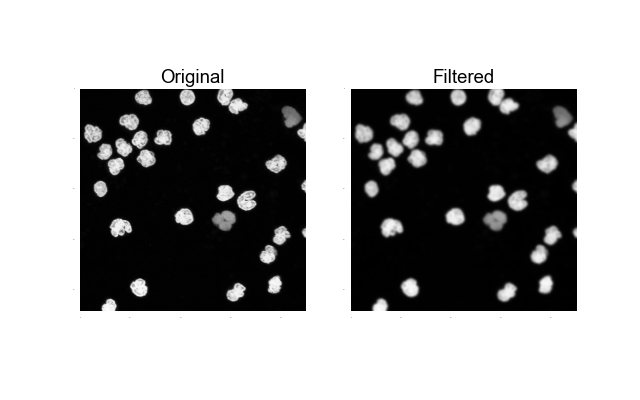

In [16]:
# smooth images with a filter

from skimage.filters import gaussian

filtered = gaussian(im, sigma=2.)
filtered = (filtered-filtered.min())/(filtered.max()-filtered.min())

fig,axs = pl.subplots(1, 2, figsize=(8,5), num='Filtered')
axs[0].imshow(im)
axs[0].set_title('Original')
axs[1].imshow(filtered)
axs[1].set_title('Filtered')

<IPython.core.display.Javascript object>


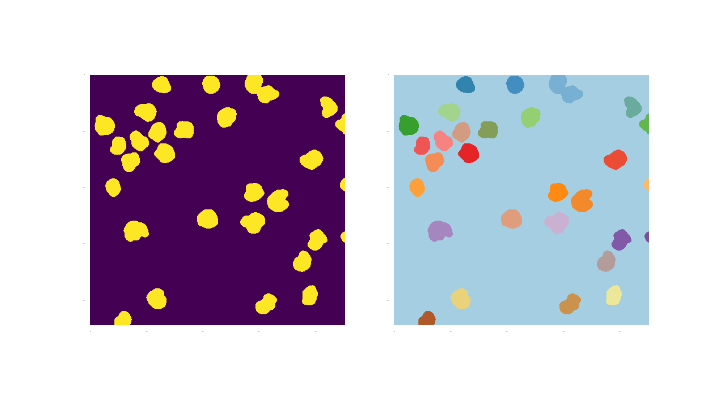

In [19]:
# basic segmentation: thresholding

thresholded = filtered > .3

fig,axs = pl.subplots(1, 2, num='Thresholding', figsize=(9,5))
axs[0].imshow(thresholded, cmap=pl.cm.viridis)

In [23]:
from scipy.ndimage import label

labels,n_labs = label(thresholded)

axs[1].imshow(labels, cmap=pl.cm.Paired)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int32)

<IPython.core.display.Javascript object>


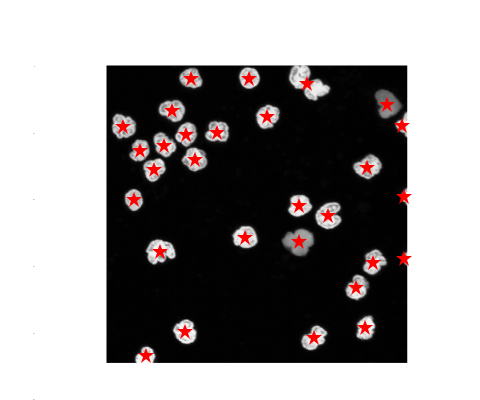

In [24]:
fig = pl.figure('Labelling cells', figsize=(6,5))
ax = fig.add_axes([0,0,1,1])
ax.imshow(im)

for i in range(1,n_labs+1):
    cy,cx = np.argwhere(labels==i).mean(axis=0)
    ax.plot(cx, cy, 'r*', markersize=15, markeredgewidth=0)

<IPython.core.display.Javascript object>


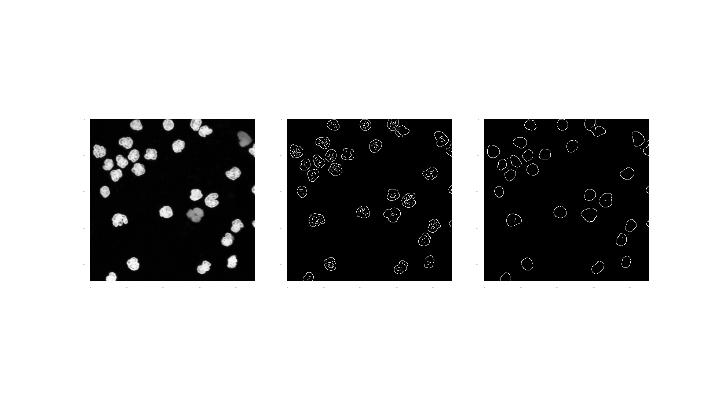

In [26]:
from skimage.feature import canny
fig,axs = pl.subplots(1, 3, num='Edge detection', figsize=(9,5))

edges1 = canny(im, 2., 5, 15)
edges2 = canny(im, 5., 10, 30)

axs[0].imshow(im)
axs[1].imshow(edges1)
axs[2].imshow(edges2)

<IPython.core.display.Javascript object>


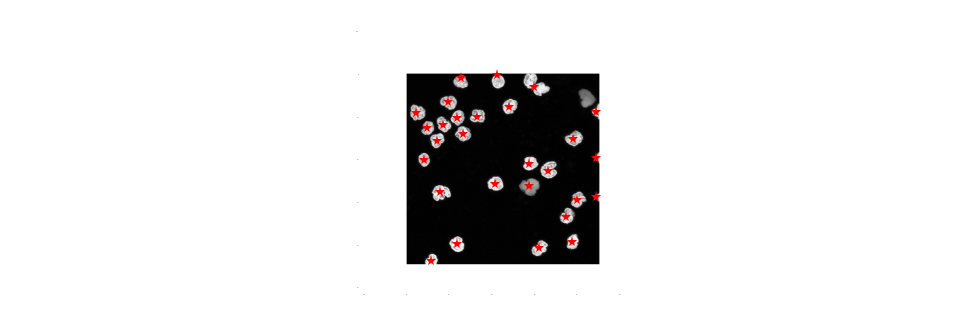

array([[   0.,  212.,   21.],
       [   7.,  127.,   21.],
       [  29.,  298.,   30.],
       [  65.,   98.,   18.],
       [  75.,  239.,   18.],
       [  88.,  443.,   12.],
       [  89.,   22.,   21.],
       [  99.,  165.,   18.],
       [ 101.,  118.,   15.],
       [ 119.,   86.,   15.],
       [ 126.,   48.,   15.],
       [ 140.,  131.,   18.],
       [ 151.,  391.,   21.],
       [ 156.,   70.,   18.],
       [ 196.,  444.,    9.],
       [ 200.,   40.,   18.],
       [ 209.,  287.,   18.],
       [ 225.,  331.,   21.],
       [ 256.,  206.,   21.],
       [ 262.,  287.,   24.],
       [ 276.,   77.,   21.],
       [ 287.,  444.,    9.],
       [ 293.,  400.,   18.],
       [ 334.,  374.,   18.],
       [ 392.,  387.,   18.],
       [ 398.,  117.,   18.],
       [ 407.,  311.,   18.],
       [ 436.,   58.,   15.]])

In [29]:
from skimage.feature import blob_doh

blobs = blob_doh(filtered, 3, 30, overlap=0.2)

pl.figure('Blob detector')
pl.imshow(im)
pl.plot(blobs[:,1], blobs[:,0], 'r*', markersize=10, markeredgewidth=0)

blobs

### Where's the kiwi?

<IPython.core.display.Javascript object>


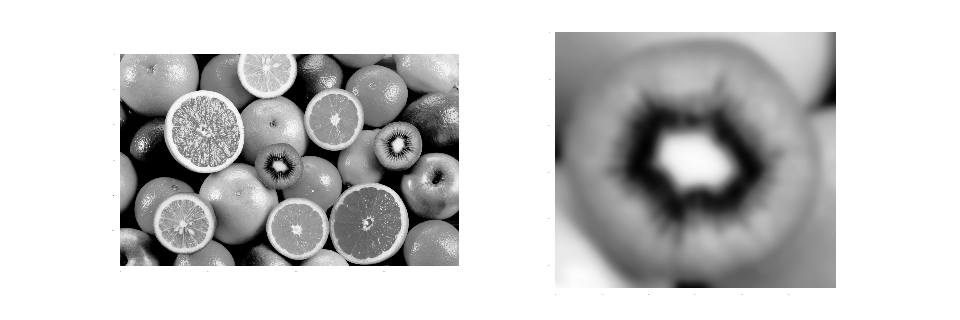

In [30]:
fruits = imread('im2.jpg')
kiwi = imread('kiwi.tif')
# convert to single channel
fruits = fruits.sum(axis=-1)
# blur kiwi
kiwi = gaussian(kiwi, 5.)

fig,axs = pl.subplots(1, 2, num='Fruits')
axs[0].imshow(fruits)
axs[1].imshow(kiwi)

<IPython.core.display.Javascript object>


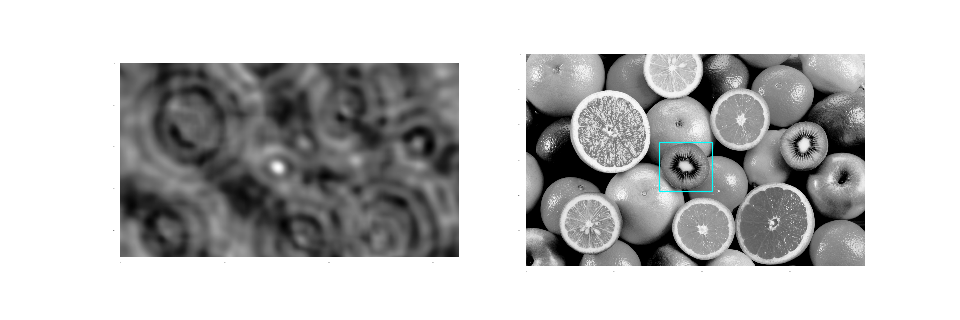

In [31]:
from skimage.feature import match_template

match = match_template(fruits, kiwi)

fig,axs = pl.subplots(1, 2, num='Template matching')
axs[0].imshow(match)
axs[1].imshow(fruits)

y,x = np.unravel_index(np.argmax(match), match.shape)
rect = pl.Rectangle((x, y), kiwi.shape[1], kiwi.shape[0], edgecolor='cyan', facecolor='none')
axs[1].add_patch(rect)

In [32]:
import cv2, time

def norm(im):
    return (255*(im-im.min())/(im.max()-im.min())).astype(np.uint8)

fruits = norm(fruits)
kiwi = norm(kiwi)

t0 = time.clock()
match_cv = cv2.matchTemplate(fruits, kiwi, cv2.TM_CCORR_NORMED)
t_cv = time.clock()-t0
y,x = np.unravel_index(np.argmax(match_cv), match.shape)
rect_cv = pl.Rectangle((x, y), kiwi.shape[1], kiwi.shape[0], edgecolor='cyan', facecolor='none')

t0 = time.clock()
match_sk = match_template(fruits, kiwi)
t_sk = time.clock()-t0
y,x = np.unravel_index(np.argmax(match_cv), match.shape)
rect_sk = pl.Rectangle((x, y), kiwi.shape[1], kiwi.shape[0], edgecolor='cyan', facecolor='none')

<IPython.core.display.Javascript object>


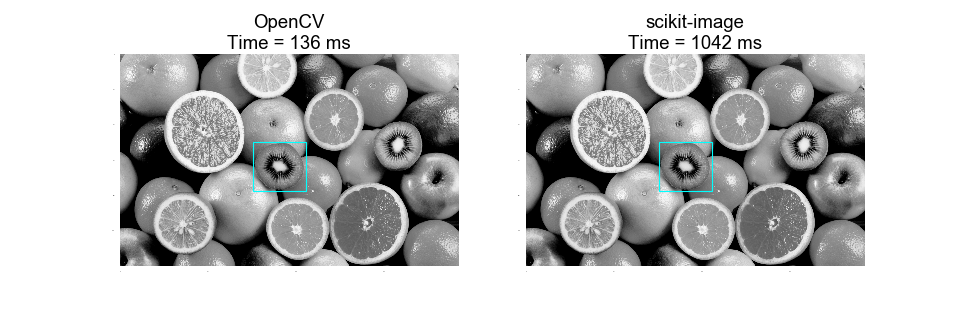

In [33]:
fig,axs = pl.subplots(1,2,num='CV vs SK')
axs[0].imshow(fruits)
axs[0].add_patch(rect_cv)
axs[0].set_title('OpenCV\nTime = {:0.0f} ms'.format(t_cv*1000))
axs[1].imshow(fruits)
axs[1].add_patch(rect_sk)
axs[1].set_title('scikit-image\nTime = {:0.0f} ms'.format(t_sk*1000))

### Movies

In [34]:
movie = imread('celegans.tif')

<IPython.core.display.Javascript object>


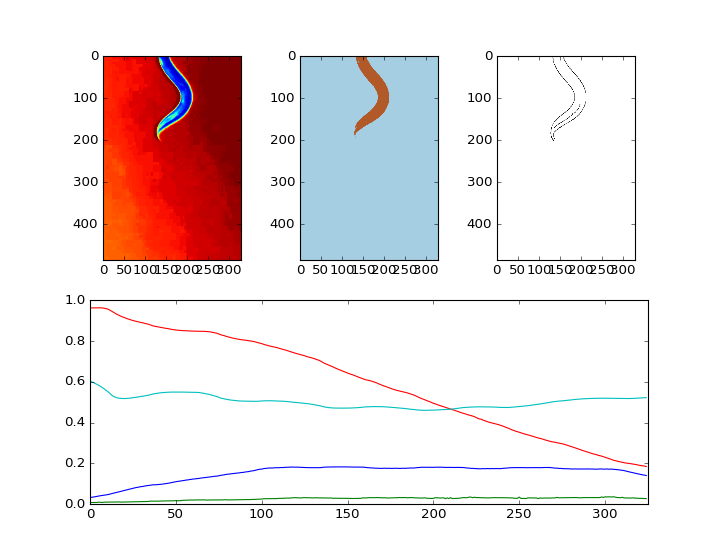

In [35]:
from scipy.ndimage import binary_fill_holes
from skimage.feature import canny
import matplotlib.gridspec as gridspec
pl.style.use('classic')

fig = pl.figure('Movie', figsize=(9,7))
gs = gridspec.GridSpec(2, 3)

ax0 = pl.subplot(gs[0,0])
ax1 = pl.subplot(gs[0,1])
ax2 = pl.subplot(gs[0,2])
ax3 = pl.subplot(gs[1,:])

raw = ax0.imshow(movie[0])
thresh = ax1.imshow(movie[0], vmin=0, vmax=1, cmap=pl.cm.Paired)
contour = ax2.imshow(movie[0], vmin=0, vmax=1, cmap=pl.cm.Greys)
sigs = np.zeros([len(movie),4])
sigs[:] = np.nan
lines = ax3.plot(np.arange(len(movie)), sigs)
ax3.set_xlim(0, len(movie))
ax3.set_ylim(0, 1)

for idx,frame in enumerate(movie):
    raw.set_data(frame)
    
    thresholded = frame < 0.4
    thresh.set_data(thresholded)
    
    edges = canny(frame, 2.5, 0.05, 0.25)
    contour.set_data(edges)
    
    sigs[idx,0] = 4 * np.sum(thresholded) / np.product(frame.shape)
    sigs[idx,1] = 6 * np.sum(edges) / np.product(frame.shape)
    sigs[idx,[2,3]] = np.argwhere(thresholded).mean(axis=0) / np.asarray(frame.shape)
    
    for l,s in zip(lines,sigs.T):
        l.set_ydata(s)
    
    fig.canvas.draw()